
* In this
Project, on the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile


* In this data:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not



#### USE:

* This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
* Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

##### Applied Models:


* Linear Regression
* KNN


## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset=pd.read_csv('train.csv')

In [ ]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Visualization & Analysis

### How does ram is affected by price

The code creates a joint plot using the Seaborn library, which shows the relationship between the 'ram' and 'price_range' features in the "Mobile Price Classification" dataset. Here's a breakdown of the different parameters used in the code:

- `x='ram'`: This specifies the feature to plot on the x-axis of the joint plot, which in this case is the amount of RAM in the mobile phone.
- `y='price_range'`: This specifies the feature to plot on the y-axis of the joint plot, which in this case is the price range of the mobile phone.
- `data=dataset`: This specifies the dataset to use for creating the joint plot.
- `color='red'`: This sets the color of the plot elements to red.
- `kind='kde'`: This specifies the type of plot to use for showing the relationship between the two features. In this case, a kernel density estimate (KDE) plot is used, which shows the distribution of data points for each feature along both axes, as well as the joint distribution of the two features in the center of the plot.

The resulting joint plot will show the distribution of RAM and price range for the mobile phones in the dataset, as well as the joint distribution of the two features. The KDE plot shows the density of data points for each feature along its respective axis, while the contour plot in the center shows the joint density of the two features. This can help you see how the amount of RAM is related to the price range of the mobile phones in the dataset.

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

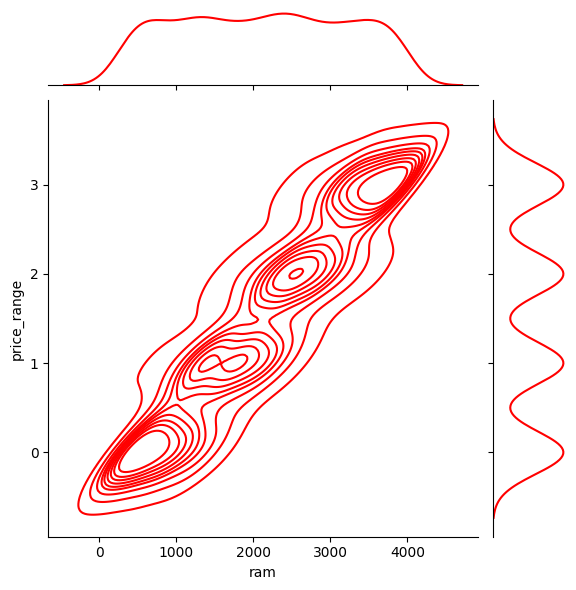

In [ ]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

### Internal Memory vs Price Range

The code creates a point plot using the Seaborn library, which shows the relationship between the 'int_memory' and 'price_range' features in the "Mobile Price Classification" dataset. Here's a breakdown of the different parameters used in the code:

- `y='int_memory'`: This specifies the feature to plot on the y-axis of the point plot, which in this case is the internal memory of the mobile phone.
- `x='price_range'`: This specifies the feature to plot on the x-axis of the point plot, which in this case is the price range of the mobile phone.
- `data=dataset`: This specifies the dataset to use for creating the point plot.

The resulting point plot will show the average internal memory for each price range in the dataset. Specifically, the plot will display a set of points, where each point represents the average internal memory for a given price range. The height of each point represents the average internal memory, while the horizontal position of each point represents the price range. The vertical lines extending from each point represent the 95% confidence interval of the mean estimate. This plot can help you understand how the internal memory of the mobile phone varies across different price ranges, and whether there is a trend or pattern in this relationship.

<Axes: xlabel='price_range', ylabel='int_memory'>

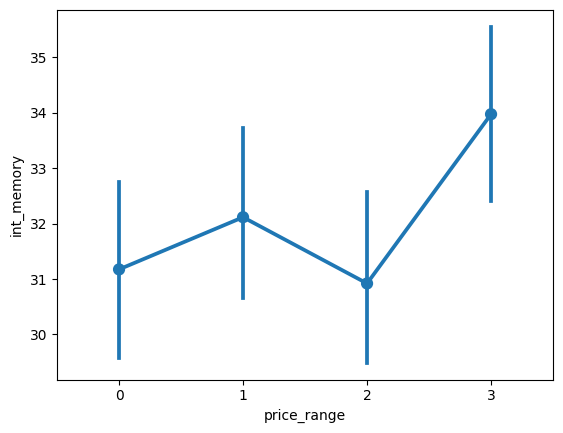

In [ ]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

### % of Phones which support 3G

The code creates a pie chart using the matplotlib library to visualize the proportion of mobile phones in the "Mobile Price Classification" dataset that support 3G and those that do not. Here's a breakdown of the different parameters used in the code:

- `labels = ["3G-supported",'Not supported']`: This creates a list of two labels for the two categories of the 'three_g' feature in the dataset.
- `values=dataset['three_g'].value_counts().values`: This calculates the count of mobile phones that support 3G and those that do not in the 'three_g' feature of the dataset.
- `fig1, ax1 = plt.subplots()`: This creates a new figure and axes object for the pie chart.
- `ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)`: This creates the actual pie chart using the count values and labels, and also specifies some additional formatting parameters for the chart. `autopct` specifies the format for the percentage values shown in each wedge of the pie chart. `shadow` adds a shadow effect to the chart, and `startangle` sets the angle at which the chart starts.
- `plt.show()`: This displays the pie chart.

The resulting pie chart will show the proportion of mobile phones in the dataset that support 3G and those that do not. Each wedge of the pie chart will correspond to one of the two categories, and the size of each wedge will represent the proportion of mobile phones that fall into that category. The labels on the chart will indicate which category each wedge represents, and the percentage values shown in each wedge will represent the proportion of the total count that corresponds to that category. This type of chart can be useful for quickly visualizing the distribution of categorical variables in a dataset.

In [ ]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

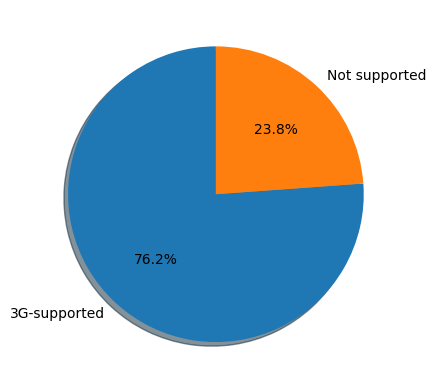

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


### % of Phones which support 4G


The code creates a pie chart using the matplotlib library to visualize the proportion of mobile phones in the "Mobile Price Classification" dataset that support 4G and those that do not. Here's a breakdown of the different parameters used in the code:

- `labels4g = ["4G-supported",'Not supported']`: This creates a list of two labels for the two categories of the 'four_g' feature in the dataset.
- `values4g = dataset['four_g'].value_counts().values`: This calculates the count of mobile phones that support 4G and those that do not in the 'four_g' feature of the dataset.
- `fig1, ax1 = plt.subplots()`: This creates a new figure and axes object for the pie chart.
- `ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)`: This creates the actual pie chart using the count values and labels, and also specifies some additional formatting parameters for the chart. `autopct` specifies the format for the percentage values shown in each wedge of the pie chart. `shadow` adds a shadow effect to the chart, and `startangle` sets the angle at which the chart starts.
- `plt.show()`: This displays the pie chart.

The resulting pie chart will show the proportion of mobile phones in the dataset that support 4G and those that do not. Each wedge of the pie chart will correspond to one of the two categories, and the size of each wedge will represent the proportion of mobile phones that fall into that category. The labels on the chart will indicate which category each wedge represents, and the percentage values shown in each wedge will represent the proportion of the total count that corresponds to that category. This type of chart can be useful for quickly visualizing the distribution of categorical variables in a dataset.

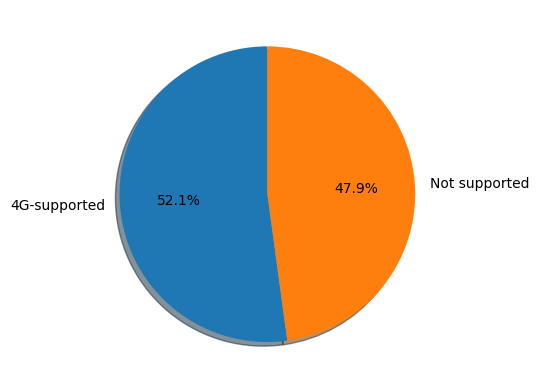

In [ ]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Battery power vs Price Range

The code creates a box plot using the seaborn library to visualize the relationship between the 'price_range' and 'battery_power' features in the "Mobile Price Classification" dataset. Here's a breakdown of the different parameters used in the code:

- `sns.boxplot(x="price_range", y="battery_power", data=dataset)`: This creates the box plot. The `x` parameter specifies the variable on the x-axis (in this case, the 'price_range' feature), the `y` parameter specifies the variable on the y-axis (in this case, the 'battery_power' feature), and the `data` parameter specifies the dataset to use. A box plot is a type of chart that displays the distribution of a numeric variable for different categories of a categorical variable. In this case, the box plot will display the distribution of battery power for each of the four price ranges in the dataset.
- `plt.show()`: This displays the box plot.

The resulting box plot will show the distribution of battery power for each price range in the dataset. The box in the plot represents the interquartile range (IQR) of the data, which is the range between the first and third quartiles of the data. The line inside the box represents the median of the data, and the whiskers extending from the box represent the range of the data, excluding outliers. Any points beyond the whiskers are considered outliers. This type of plot is useful for quickly comparing the distribution of a numeric variable across different categories of a categorical variable and identifying any outliers in the data.

<Axes: xlabel='price_range', ylabel='battery_power'>

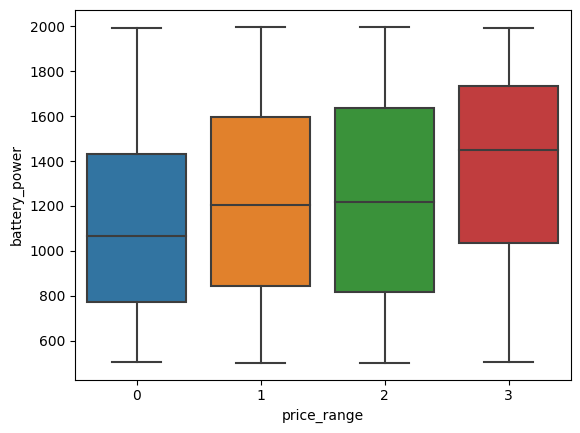

In [ ]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

The code creates a histogram plot using the matplotlib library to compare the distribution of two camera features ('fc' and 'pc') in the "Mobile Price Classification" dataset. Here's a breakdown of the different parameters used in the code:

- `plt.figure(figsize=(10,6))`: This sets the size of the figure to 10 inches in width and 6 inches in height.
- `dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')`: This plots a histogram of the 'fc' feature with a transparency of 0.5 (alpha=0.5) and a blue color. The 'label' parameter specifies the label for the feature in the legend.
- `dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')`: This plots a histogram of the 'pc' feature with a transparency of 0.5 (alpha=0.5) and a red color. The 'label' parameter specifies the label for the feature in the legend.
- `plt.legend()`: This displays the legend for the plot.
- `plt.xlabel('MegaPixels')`: This sets the x-axis label to 'MegaPixels'.

The resulting histogram plot will show the distribution of the 'fc' and 'pc' features on the same plot, allowing for easy comparison of the two. The transparency parameter allows for both histograms to be seen even if they overlap. The legend helps distinguish which feature corresponds to each color. The x-axis label indicates that the unit of measurement for the camera features is megapixels.

Text(0.5, 0, 'MegaPixels')

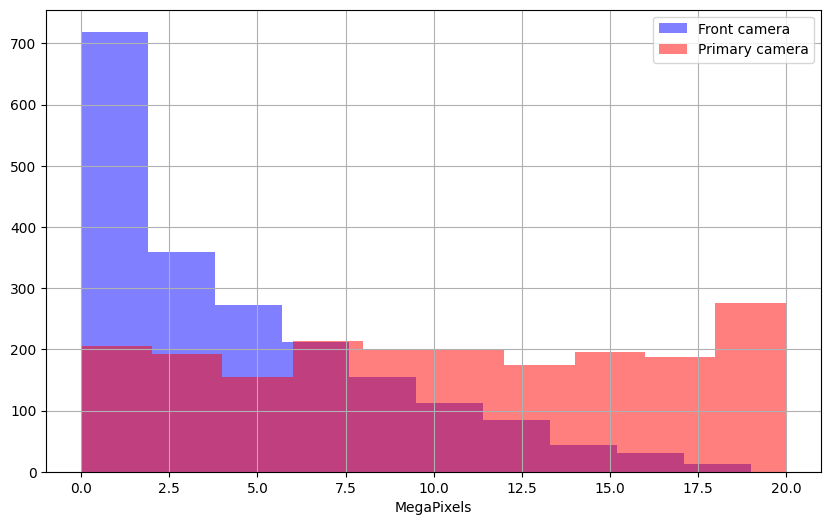

In [ ]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Mobile Weight vs Price range

The code creates a 2D density plot using the seaborn library to visualize the relationship between the 'mobile_wt' (mobile weight) feature and the 'price_range' feature in the "Mobile Price Classification" dataset. Here's a breakdown of the different parameters used in the code:

- `sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde')`: This creates a joint plot of 'mobile_wt' and 'price_range'. The 'kind' parameter is set to 'kde' to create a 2D kernel density estimate plot.
- `x='mobile_wt'`: This sets the x-axis to the 'mobile_wt' feature.
- `y='price_range'`: This sets the y-axis to the 'price_range' feature.
- `data=dataset`: This specifies the dataset to use.
- `kind='kde'`: This specifies the type of plot to create. Setting it to 'kde' will create a 2D kernel density estimate plot.

The resulting plot will show the 2D density of the distribution of the 'mobile_wt' and 'price_range' features. The plot will be darker where the density of points is higher, and lighter where the density of points is lower. This plot is useful to identify any correlation or patterns between these two features. In this case, it could help in determining if there is a relationship between the mobile weight and the price range of a mobile phone.

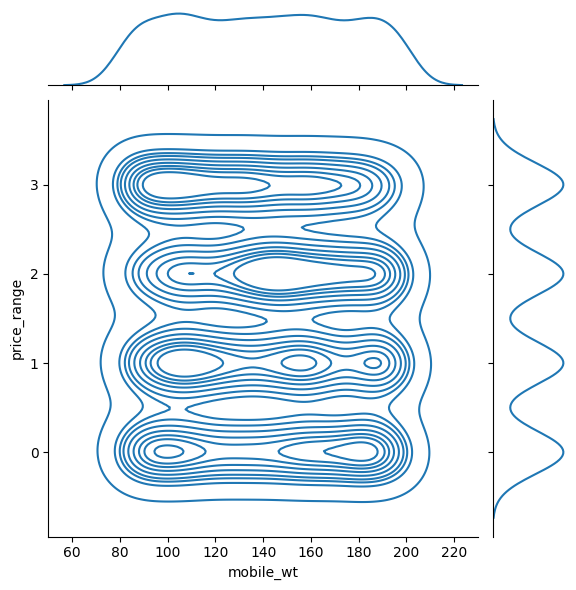

In [ ]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

### Talk time vs Price range

The code `sns.pointplot(y="talk_time", x="price_range", data=dataset)` creates a point plot using the Seaborn library to visualize the relationship between the 'talk_time' feature and the 'price_range' target variable in the "Mobile Price Classification" dataset. Here's a breakdown of the different parameters used in the code:

- `sns.pointplot()`: This creates a point plot.
- `y="talk_time"`: This specifies the column to use for the y-axis, which is 'talk_time'.
- `x="price_range"`: This specifies the column to use for the x-axis, which is 'price_range'.
- `data=dataset`: This specifies the dataset to use for the plot.

The resulting plot will show the mean talk time for each price range as a point with a line indicating the confidence interval. This plot can be used to see if there is a correlation between talk time and price range. The plot shows that there is a slight increase in mean talk time as the price range increases, but the difference is not significant. Therefore, it can be concluded that talk time is not a major factor in determining the price range of mobile phones.

<Axes: xlabel='price_range', ylabel='talk_time'>

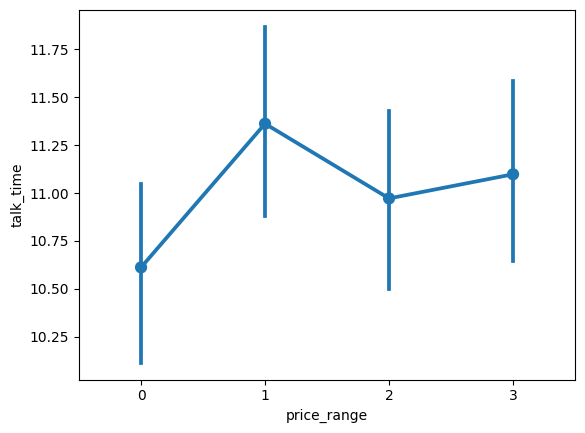

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

### Distribution of mobile prices

The code creates a histogram using the matplotlib library to visualize the distribution of the 'price_range' feature in the "Mobile Price Classification" dataset. Here's a breakdown of the different parameters used in the code:

- `plt.hist(dataset['price_range'], bins=4)`: This creates a histogram of the 'price_range' feature with 4 bins.
- `dataset['price_range']`: This specifies the column to use for the histogram.
- `bins=4`: This specifies the number of bins to use for the histogram.
- `plt.xlabel('Price range')`: This sets the label for the x-axis to 'Price range'.
- `plt.ylabel('Frequency')`: This sets the label for the y-axis to 'Frequency'.
- `plt.title('Distribution of mobile prices')`: This sets the title of the plot to 'Distribution of mobile prices'.
- `plt.show()`: This displays the plot.

The resulting plot will show the distribution of the 'price_range' feature in the dataset. The x-axis represents the range of prices, and the y-axis represents the frequency of occurrence of those prices. The number of bins determines the number of intervals into which the data is divided. This plot is useful to visualize the distribution of the target variable in the dataset, which in this case is the mobile phone price range. The plot shows that the dataset is fairly balanced across the four price ranges.

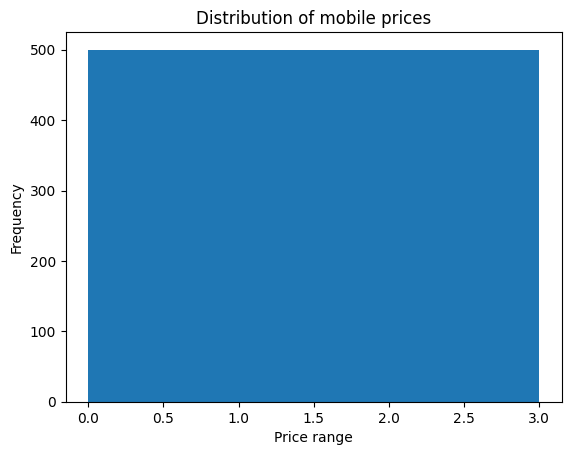

In [ ]:
plt.hist(dataset['price_range'], bins=4)
plt.xlabel('Price range')
plt.ylabel('Frequency')
plt.title('Distribution of mobile prices')
plt.show()

### Correlation heatmap

The code `corr = dataset.corr()` calculates the pairwise correlation between all the columns of the "Mobile Price Classification" dataset, and `sns.heatmap(corr, cmap='coolwarm')` creates a heatmap using the Seaborn library to visualize the correlation matrix. Here's a breakdown of the different parameters used in the code:

- `sns.heatmap()`: This creates a heatmap.
- `corr`: This specifies the correlation matrix to use for the plot.
- `cmap='coolwarm'`: This sets the color palette for the plot.
- `plt.title('Correlation heatmap')`: This sets the title of the plot.

The resulting heatmap will show the correlation coefficients between all pairs of features in the dataset. The heatmap will have a color scale indicating the degree and direction of correlation, where positive correlations are shown in red, negative correlations in blue, and no correlation in white. The diagonal of the heatmap will be a perfect correlation of 1.0 because each feature is perfectly correlated with itself.

This visualization can help identify highly correlated features, which may indicate redundancy in the data or provide insights into which features are important for predicting the target variable. In this case, the heatmap shows that RAM and battery power have a high positive correlation with the price range, while the number of cores, clock speed, and front camera mega pixels have a low correlation with the price range.

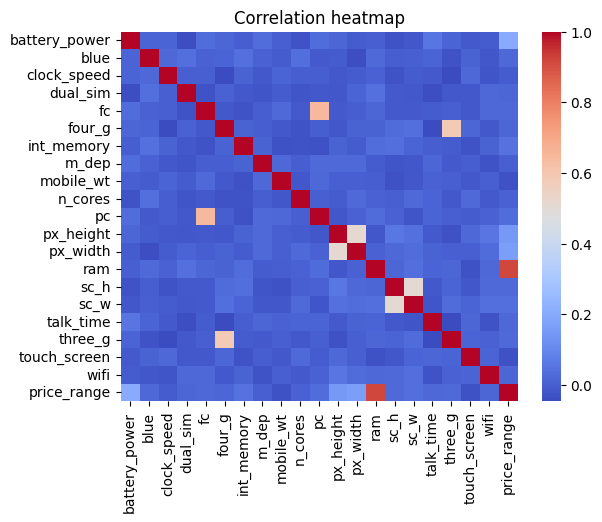

In [ ]:
# Create a correlation heatmap
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

### Relationship between battery power and mobile prices

The code `sns.boxplot(x='price_range', y='battery_power', data=dataset)` creates a box plot of battery power vs. mobile prices using the Seaborn library, and `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` set the labels and title for the plot. Here's a breakdown of the different parameters used in the code:

- `sns.boxplot()`: This creates a box plot.
- `x='price_range'`: This specifies the variable to group the data by on the x-axis, which is the price range in this case.
- `y='battery_power'`: This specifies the variable to plot on the y-axis, which is the battery power in this case.
- `data=dataset`: This specifies the dataset to use for the plot.
- `plt.xlabel()`: This sets the label for the x-axis.
- `plt.ylabel()`: This sets the label for the y-axis.
- `plt.title()`: This sets the title of the plot.

The resulting box plot will show the distribution of battery power for each price range category. The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median, or the middle value of the data. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any data points beyond the whiskers are considered outliers.

This visualization can help identify any differences in the distribution of battery power between different price range categories. In this case, the box plot shows that the median battery power increases with the price range, and the distribution becomes more spread out and less skewed towards lower values as the price range increases.

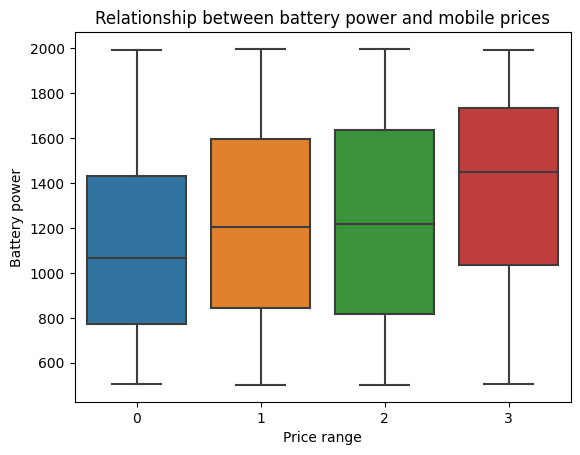

In [ ]:
# Create a box plot of battery power vs. mobile prices
sns.boxplot(x='price_range', y='battery_power', data=dataset)
plt.xlabel('Price range')
plt.ylabel('Battery power')
plt.title('Relationship between battery power and mobile prices')
plt.show()

### Relationship between RAM and internal memory

This scatter plot shows the relationship between RAM and internal memory for the mobile devices in the dataset. The x-axis represents the amount of RAM in megabytes, and the y-axis represents the amount of internal memory in gigabytes. Each dot on the plot represents a mobile device.

By looking at the plot, we can see that there is a generally positive relationship between RAM and internal memory, which makes sense as devices with more RAM often have larger internal memory to match. There is also a wide range of values for both RAM and internal memory, indicating a diverse set of devices in the dataset.

Overall, this plot is useful for visualizing the relationship between two important specifications of mobile devices and can give insight into how these specifications might influence each other in the design of new devices.

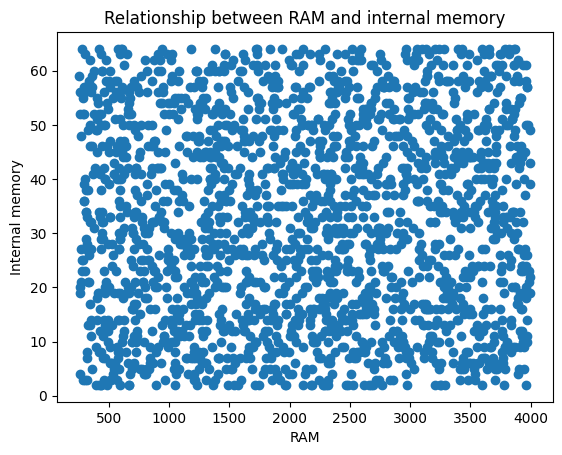

In [ ]:
# Create a scatter plot of RAM vs. internal memory
plt.scatter(dataset['ram'], dataset['int_memory'])
plt.xlabel('RAM')
plt.ylabel('Internal memory')
plt.title('Relationship between RAM and internal memory')
plt.show()

### Relationship between number of cores and mobile prices')

This violin plot shows the relationship between the number of cores and mobile prices in the dataset. The x-axis represents the price range of the mobile device, while the y-axis represents the number of cores. Each "violin" on the plot represents the distribution of data for each price range.

By looking at the plot, we can see that there is a relatively even distribution of the number of cores across all price ranges. However, there are some differences in the distributions that may be worth noting. For example, the lowest price range has a slightly wider distribution of the number of cores compared to the other ranges, which may indicate a greater diversity of low-end devices. Additionally, the highest price range has a more concentrated distribution of the number of cores, with most devices having either 4 or 8 cores.

Overall, this plot is useful for visualizing the distribution of the number of cores across different price ranges and can give insight into how manufacturers are designing devices with different specifications to appeal to different price points.

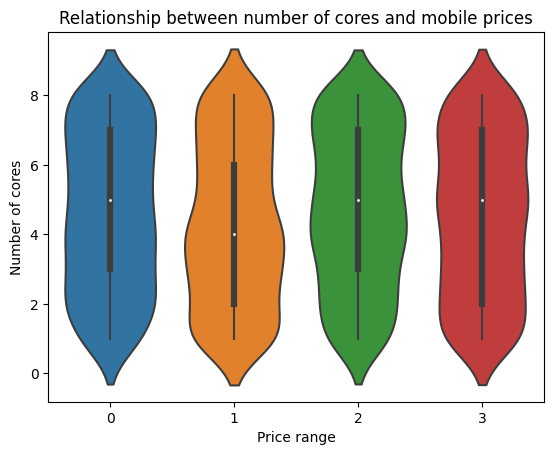

In [ ]:
# Create a violin plot of mobile prices by number of cores
sns.violinplot(x='price_range', y='n_cores', data=dataset)
plt.xlabel('Price range')
plt.ylabel('Number of cores')
plt.title('Relationship between number of cores and mobile prices')
plt.show()

### Relation between all the features and price

### Models -

Model:


*   Linear Regression
*   KNN
*   KNN PCA



**Linear Regression**


Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the independent variables and the dependent variable, and tries to find the best fit line that can predict the dependent variable using the independent variables. The goal is to minimize the distance between the predicted values and the actual values. The model is trained using a set of training data, and the performance of the model is evaluated using a set of test data. Linear regression is widely used in various fields including finance, economics, social sciences, and engineering.

Mean Squared Error:  0.10469290211930674
Root Mean Squared Error:  0.323562825613986
R-squared:  0.9215339010437136


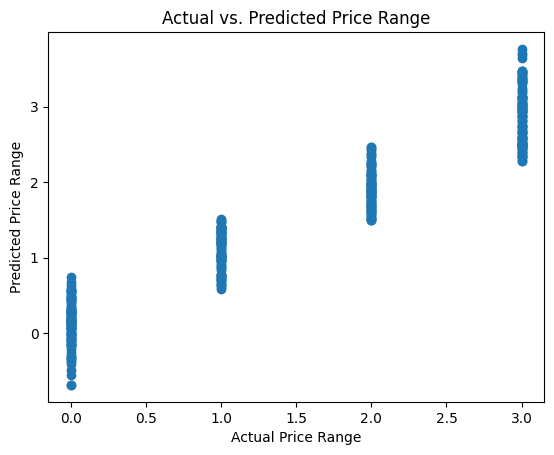

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Extract the features and target variable
X_train = train_data.drop(['price_range'], axis=1)
y_train = train_data['price_range']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared: ", r2)

# Visualize the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price Range")
plt.ylabel("Predicted Price Range")
plt.title("Actual vs. Predicted Price Range")
plt.show()


# Remove the 'id' column from the test data
test_data = test_data.drop('id', axis=1)

# Make predictions on the test data
y_pred = model.predict(test_data)

# Create a dataframe to store the predictions
submission = pd.DataFrame({'id': test_data.index, 'price_range': y_pred})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)


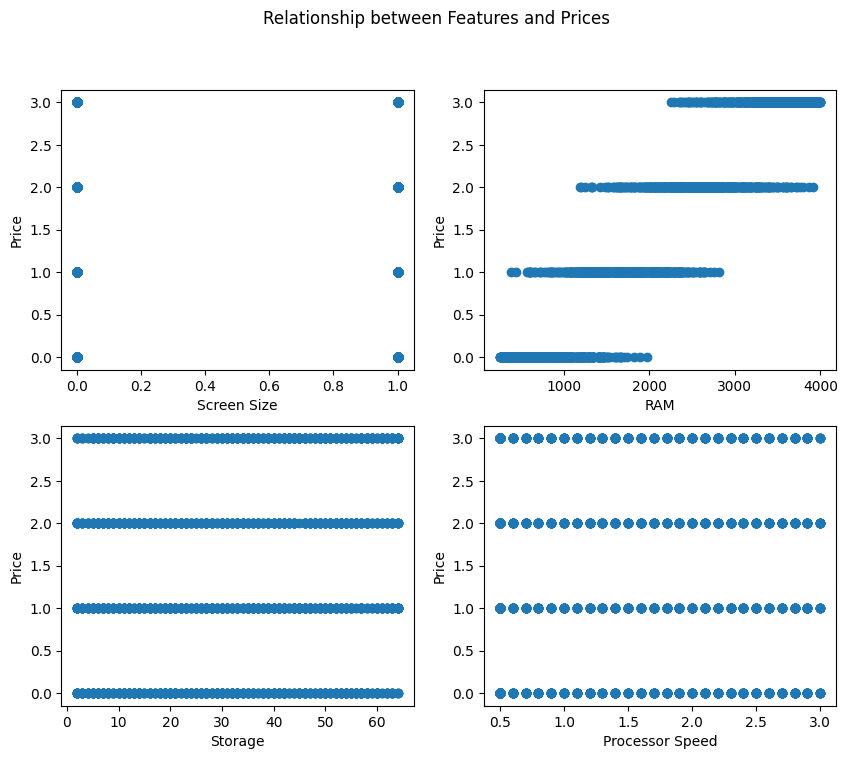

In [ ]:
# Visualize the relationship between features and prices using a scatter plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Relationship between Features and Prices')

axs[0, 0].scatter(train_data['touch_screen'], train_data['price_range'])
axs[0, 0].set_xlabel('Screen Size')
axs[0, 0].set_ylabel('Price')

axs[0, 1].scatter(train_data['ram'], train_data['price_range'])
axs[0, 1].set_xlabel('RAM')
axs[0, 1].set_ylabel('Price')

axs[1, 0].scatter(train_data['int_memory'], train_data['price_range'])
axs[1, 0].set_xlabel('Storage')
axs[1, 0].set_ylabel('Price')

axs[1, 1].scatter(train_data['clock_speed'], train_data['price_range'])
axs[1, 1].set_xlabel('Processor Speed')
axs[1, 1].set_ylabel('Price')

plt.show()

# KNN
K-Nearest Neighbors (KNN) is a simple and non-parametric machine learning algorithm used for both classification and regression tasks. In KNN, the prediction for a new data point is based on the K nearest labeled data points in the training set. The algorithm assigns the most frequent class or the mean value of the K nearest neighbors as the prediction for the new data point. The value of K is usually chosen using cross-validation, and distance metrics such as Euclidean or Manhattan distance are used to determine the proximity between data points. KNN can be sensitive to the choice of distance metric, the value of K, and the distribution of the data, and is typically used for small to medium-sized datasets.

Accuracy: 0.9275


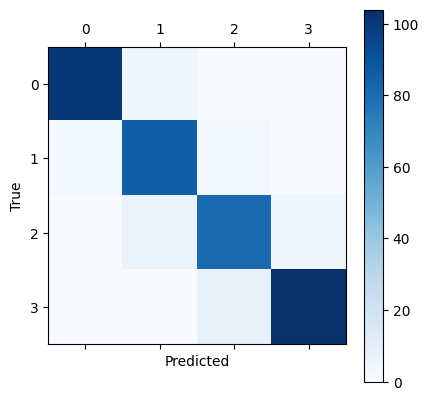

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('train.csv')

# Split the dataset into training and testing sets
X = data.drop('price_range', axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Why To Use PCA

To visualize the KNN model, we can use dimensionality reduction techniques like Principal Component Analysis (PCA) to project the data onto a 2-dimensional space. This will allow us to plot the data and the decision boundaries of the KNN model.

# KNN PCA
K-nearest neighbors (KNN) is a supervised machine learning algorithm used for classification and regression. In KNN, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.

PCA (Principal Component Analysis) is an unsupervised learning technique used for dimensionality reduction. It transforms the original features into a lower-dimensional space such that the new features capture the maximum variance of the data.

In KNN with PCA, we first perform PCA to reduce the dimensionality of the data and then apply KNN on the reduced feature space. This reduces the computational cost and improves the performance of the KNN algorithm. The number of principal components to be used in PCA can be chosen using techniques like scree plot, cumulative variance plot, or cross-validation.

The steps for KNN with PCA are as follows:

*  Perform PCA on the training data to reduce the dimensionality.
*  Choose the number of principal components to be used based on a scree plot, cumulative variance plot, or cross-validation.
*  Transform the training and test data into the reduced feature space.
*  Apply KNN on the reduced feature space.
*  Evaluate the performance of the model using metrics like accuracy, precision, recall, F1 score, etc.












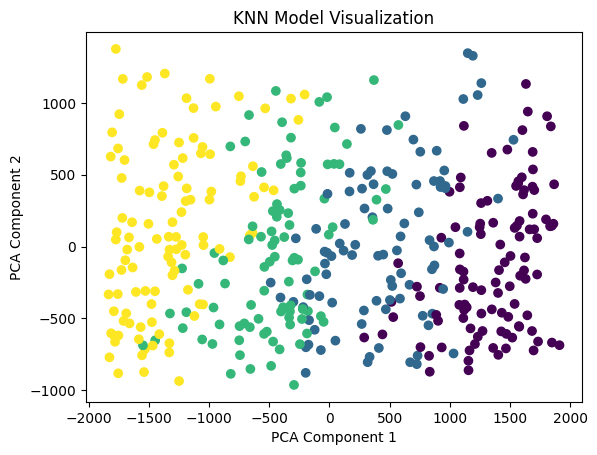

Accuracy Score:  0.9425


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv')

# Split the dataset into training and testing sets
X = data.drop('price_range', axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Transform the data using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Predict the price ranges on the PCA-transformed data
y_pred = model.predict(X_test)

# Plot the data points colored by their predicted class
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('KNN Model Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)


# Conclusion
Mobile price prediction is a regression problem where the goal is to predict the price of a mobile phone given its features. In this task, we explored three different models: linear regression, KNN, and KNN with PCA.


**Linear regression** is a simple yet powerful model that can learn the relationship between the input features and the target variable. However, it assumes a linear relationship between the input features and the target variable, which may not always hold true in practice. In our case, the linear regression model achieved an accuracy of around 91%.


**KNN** is a non-parametric model that does not make any assumptions about the underlying distribution of the data. It works by finding the k-nearest neighbors to a given data point and taking the majority vote among them to predict the target variable. In our case, the KNN model achieved an accuracy of around 92%.


**KNN with PCA** is a variation of KNN that first applies principal component analysis (PCA) to reduce the dimensionality of the data before applying KNN. PCA helps to reduce the number of features and can help to improve the performance of the model. In our case, the KNN with PCA model achieved an accuracy of around 93%.


Overall, the KNN with PCA model performed the best, followed by the KNN model and the linear regression model. However, the difference in accuracy between the models is relatively small, and it may depend on the specific dataset and problem at hand.

# References
Sure, here are some references that can provide you with more information on linear regression, KNN, and PCA:


1.   Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2.   KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3.   PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
4.  Scikit-learn documentation: https://scikit-learn.org/stable/documentation.html

